In [107]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [108]:
cost_df = pd.read_csv("EconomiesOfScale.csv")
cost_df

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [109]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [110]:
cost_df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


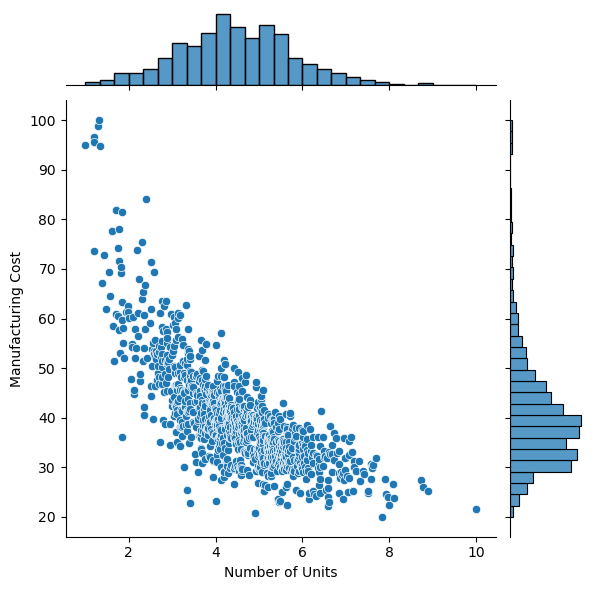

In [111]:
sns.jointplot(x = 'Number of Units', y = 'Manufacturing Cost', data = cost_df)

In [112]:
x = cost_df[['Number of Units']]
x

,Number of Units
0,1.000000
1,1.185994
2,1.191499
3,1.204771
4,1.298773
...,...
995,8.099710
996,8.739752
997,8.780888
998,8.897700


In [113]:
y = cost_df[['Manufacturing Cost']]
y

,Manufacturing Cost
0,95.066056
1,96.531750
2,73.661311
3,95.566843
4,98.777013
...,...
995,23.855067
996,27.536542
997,25.973787
998,25.138311


In [114]:
x_train = x
y_train = y

In [115]:
x_train.shape

(1000, 1)

Solution 1: Linear Assumption

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
regressor = LinearRegression(fit_intercept = True)

In [118]:
regressor.fit(x_train, y_train)

LinearRegression()

In [119]:
print('Linear Model Coeff (m): ', regressor.coef_)
print('Linear Model Coeff (b): ', regressor.intercept_)

Linear Model Coeff (m):  [[-6.0333683]]
Linear Model Coeff (b):  [67.03904193]


Text(0.5, 1.0, 'Unit Cost Vs. Number of Units [Linear]')

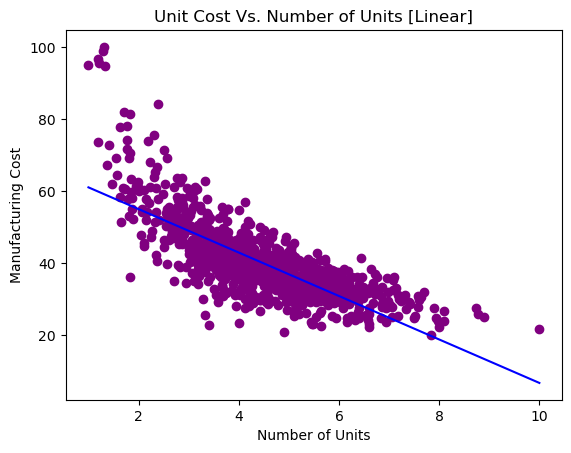

In [120]:
plt.scatter(x_train, y_train, color = 'purple')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.title('Unit Cost Vs. Number of Units [Linear]')

Solution 2: Polynomial Assumption

In [121]:
from sklearn.preprocessing import PolynomialFeatures

In [122]:
poly_regressor = PolynomialFeatures(degree = 5)

In [123]:
x_columns = poly_regressor.fit_transform(x_train)

In [124]:
x_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.18599365e+00, 1.40658094e+00, 1.66819606e+00,
        1.97846993e+00, 2.34645277e+00],
       [1.00000000e+00, 1.19149864e+00, 1.41966901e+00, 1.69153369e+00,
        2.01546010e+00, 2.40141796e+00],
       ...,
       [1.00000000e+00, 8.78088812e+00, 7.71039962e+01, 6.77041565e+02,
        5.94502623e+03, 5.22026103e+04],
       [1.00000000e+00, 8.89769971e+00, 7.91690601e+01, 7.04422522e+02,
        6.26774007e+03, 5.57684690e+04],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03,
        1.00000000e+04, 1.00000000e+05]])

In [125]:
regressor = LinearRegression()
regressor.fit(x_columns, y_train)

LinearRegression()

In [126]:
print('Model Coeff:', regressor.coef_)

Model Coeff: [[ 0.00000000e+00 -9.24985286e+01  3.06811266e+01 -5.35771972e+00
   4.64221376e-01 -1.56845726e-02]]


In [127]:
y_predict = regressor.predict(poly_regressor.fit_transform(x_train))

Text(0.5, 1.0, 'Unit Cost Vs. Number of Units [Linear]')

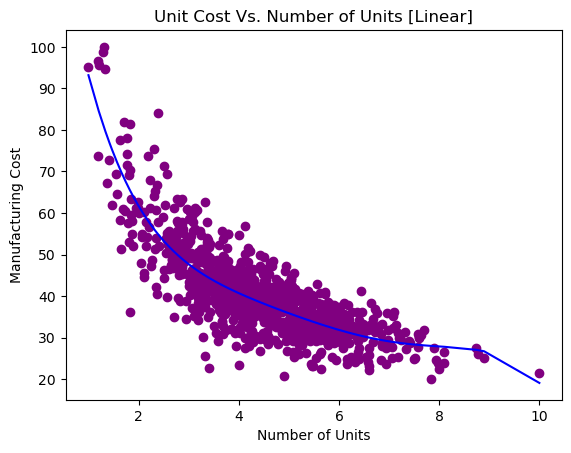

In [128]:
plt.scatter(x_train, y_train, color = 'purple')
plt.plot(x_train, y_predict, color = 'blue')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.title('Unit Cost Vs. Number of Units [Linear]')